# Unit 3 - Missing values and Data statistics
---

1. [Find rows with missing values](#section1)
2. [Remove missing values using dropna()](#section2)
3. [Fill missing values using fillna()](#section3)
4. [Fill missing values using interpolate()](#section4)
5. [Replace values](#section5)
5. [A note on slicing - copy()](#section6)
6. [GroupBy()](#section7)





In [1]:
import pandas as pd
import numpy as np

In [2]:
url = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv'
vacc_df = pd.read_csv(url)
vacc_df.shape

(114892, 16)

#### Treating missing values is optional. Sometimes we just leave the dataframe with missing values!!

In [17]:
somedata = vacc_df.loc[(vacc_df.location == 'Zimbabwe')&(vacc_df.date < "2021-02-28") ]

#### But sometimes we want to treat missing values. This graph for example:

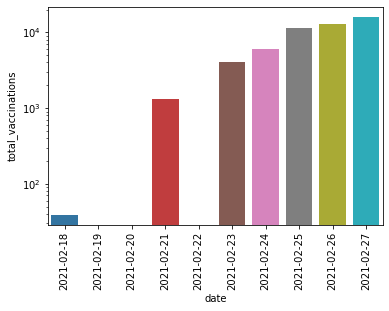

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.barplot(x = "date", y = "total_vaccinations", data = somedata)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_yscale("log")
plt.show()


<a id='section1'></a>
### 1. Find rows with missing values

`null` / `na` - no value

`NaN` - **N**ot **a** **N**umber - the value is missing. This value will be ignored in calculations such as `.mean()`

`isnull()` is a pandas function, so either use it on a dataframe or call it through pd

In [ ]:
vacc_df.head()

In [ ]:
vacc_df.isnull().sum()

##### call it through pandas:

In [ ]:
pd.isnull(vacc_df).sum()

##### View specific columns:

In [ ]:
vacc_df[['daily_vaccinations', 'total_vaccinations']].notnull().sum()

In [ ]:
vacc_df[['daily_vaccinations']].isnull().sum()

##### Using numpy: `isnan` is a numpy function

In [ ]:
np.isnan(vacc_df[['daily_vaccinations']]).sum()

<a id='section2'></a>
### 2. Remove missing values using dropna() 

##### Look at Zimbabwe for example. Zimbabwe contains missing values:

In [13]:
zimbabwe = vacc_df.loc[vacc_df.location == 'Zimbabwe']
zimbabwe.head(10)

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million,daily_people_vaccinated,daily_people_vaccinated_per_hundred
114386,Zimbabwe,ZWE,2021-02-18,39.0,39.0,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN
114387,Zimbabwe,ZWE,2021-02-19,NaN,NaN,NaN,NaN,NaN,425.0,NaN,NaN,NaN,NaN,27.0,425.0,0.003
114388,Zimbabwe,ZWE,2021-02-20,NaN,NaN,NaN,NaN,NaN,425.0,NaN,NaN,NaN,NaN,27.0,425.0,0.003
114389,Zimbabwe,ZWE,2021-02-21,1314.0,1314.0,NaN,NaN,NaN,425.0,0.01,0.01,NaN,NaN,27.0,425.0,0.003
114390,Zimbabwe,ZWE,2021-02-22,NaN,NaN,NaN,NaN,NaN,660.0,NaN,NaN,NaN,NaN,41.0,660.0,0.004
114391,Zimbabwe,ZWE,2021-02-23,4041.0,4041.0,NaN,NaN,NaN,800.0,0.03,0.03,NaN,NaN,50.0,800.0,0.005
114392,Zimbabwe,ZWE,2021-02-24,6115.0,6115.0,NaN,NaN,2074.0,1013.0,0.04,0.04,NaN,NaN,63.0,1013.0,0.006
114393,Zimbabwe,ZWE,2021-02-25,11264.0,11264.0,NaN,NaN,5149.0,1604.0,0.07,0.07,NaN,NaN,100.0,1604.0,0.010
114394,Zimbabwe,ZWE,2021-02-26,12836.0,12836.0,NaN,NaN,1572.0,1767.0,0.08,0.08,NaN,NaN,110.0,1767.0,0.011
114395,Zimbabwe,ZWE,2021-02-27,15962.0,15962.0,NaN,NaN,3126.0,2153.0,0.10,0.10,NaN,NaN,135.0,2153.0,0.013


In [ ]:
zimbabwe[['total_vaccinations']].isnull().sum()

In [ ]:
zimbabwe['total_vaccinations'].notnull().sum()

##### We can see the difference when counting the number of values per row:

In [ ]:
zimbabwe.count()

##### Remove all rows that contain one or more missing values: 

In [ ]:
zimbabwe.dropna()

Note: `dropna()`, like most other functions in the pandas API returns a new DataFrame 
(a copy of the original with changes) as the result, so you should assign it back if you want to see changes:

In [ ]:
zimbabwe.head()

assign it back:

In [ ]:
zimbabwe = zimbabwe.dropna()
zimbabwe

Re-read the df so we have the NaNs again

In [159]:
zimbabwe = vacc_df.loc[vacc_df.location == 'Zimbabwe']

# Remove all values for a specific column - using `subset`

In [ ]:
zimbabwe.dropna(subset = ['total_vaccinations'])

For more columns:

In [ ]:
zimbabwe.dropna(subset = ['total_vaccinations', 'daily_vaccinations_per_million']).head()

### We can now answer a question such as - which countries have the longest running vaccination programs?

Remember -`date` in this data is never null

Create a dataset that doesn't have null values for `people_vaccinated`


In [ ]:
vacc_df_full = vacc_df.dropna(subset = ['people_vaccinated'])

use `value counts` - count how many times each `location` shows up:

In [ ]:
vacc_df_full[["location"]].value_counts().head(10)

Remove places that are not countries

In [ ]:
vacc_df_full = vacc_df_full[(vacc_df_full.location != "Europe") & 
                            (vacc_df_full.location != "High income") &
                            (vacc_df_full.location != "World") &
                            (vacc_df_full.location != "European Union") &
                            (vacc_df_full.location != "North America") &
                            (vacc_df_full.location != "Upper middle income") &
                            (vacc_df_full.location != "Asia") &
                            (vacc_df_full.location != "South America")]

Now we can finally see the countries with the longest running vaccination program

In [ ]:
vacc_df_full[["location"]].value_counts().head(10)

Note: we alreay used `value_counts` in unit 2. What we added here is an additional step, we first removed missing values and then used value_counts

The below contains missing values for countries such as Latvia and Russia

In [ ]:
vacc_df[["location"]].value_counts().head(10)

---
>A summary of the functions so far:
>
>* `.isnull()` - display rows that contain missing values
>* `.notnull()` - display rows that don't contain missing values
>* `.dropna()` - Remove rows with missing values according to parameters:
    * `.dropna()` (default) - drops rows if at least one column has NaN
    * `.dropna(subset = ['column_name'])` - drop rows that contain missing values in the subset of column names
    * `.dropna(how='all')` - drops rows only if all of its columns have NaNs
    * `.dropna(thresh = k)` - k how many non-null values you want to keep (k=3 means the row should contain at least 3 non-null values)
    * `.dropna(axis=1)` - drop columns instead of rows
>

See documnetation [here.](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html)

---


<a id='section3'></a>
### 3. Fill missing values using fillna()

Use `.fillna()` to fill missing dataframe values with:
* Whatever value you choose
* Mean, median, mode

This is called *imputation*

Replace all NaNs with 0s

In [ ]:
vacc_df.fillna(0, inplace = False )
vacc_df

>`inplace = False` is the default. This doesn't change the vacc_df dataframe. 
>
>To change it you need:
>
>`vacc_df.fillna(0 , inplace = True)`
>
>or to assign:
>
>`vacc_df = vacc_df.fillna(0)`
>
>But we won't do that! This is where some **business understanding** comes in: it's not a good idea to fill a column like `total_vaccinations` with 0s. 
>
>See what happens:

In [ ]:
vacc_df.fillna(0).head(10)

So we'll use 0's only for the daily_vaccinations columns, and perhaps for some other columns (which?)

In [ ]:
vacc_df['daily_vaccinations'].fillna(0 , inplace = True)

Other options - using central measures:

In [6]:
# Using median
vacc_df['daily_vaccinations'].fillna(vacc_df['daily_vaccinations'].median(), inplace=True)
  
# Using mean
#vacc_df['daily_vaccinations'].fillna(vacc_df['daily_vaccinations'].mean(), inplace=True)
  
# Using mode
#vacc_df['daily_vaccinations'].fillna(vacc_df['daily_vaccinations'].mode(), inplace=True)


What about `total_vaccinations`? - there are some `NaN`s there as well:

In [ ]:
vacc_df.iloc[52:62,[0,2,3]]

For the `total_vaccinations` we'll use `ffill` which fills the missing values with first non-missing value that occurs before it.

Yes, `bfill` exists as well. If does what you think it does :-)

In [ ]:
vacc_df[['date','total_vaccinations']].fillna(method='ffill')[52:62]
#vacc_df['total_vaccinations'][52:62]

check it again - what happened?

In [ ]:
vacc_df.iloc[52:62,[0,2,3]]

The last value for some country might be NaN 

Business understanding: this isn't good enought! We need to aggregate by country!!

In [ ]:
vacc_df['total_vacc_no_missing'] = vacc_df.groupby('location')[['total_vaccinations']].apply(lambda x: x.fillna(method='ffill'))
vacc_df.iloc[375:385,[0,2,3,16]]

##### Note: `fillna(inplace = True)` does not work when `.loc` is used. 

<a id='section4'></a>
### 4. Fill missing values using interpolate()

In [ ]:
vacc_df['total_vacc_interpolate'] = vacc_df['total_vaccinations'].interpolate(method ='linear') 
vacc_df.iloc[44:62,[0,2,3,16, 17]]

<a id='section5'></a>
### 5. Replace values

Sometime we need to replace values, not fill missing values.

[replace documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html)

> you try!
>
> read the documentation and try to figure out how it's done

In [11]:
vacc_df['total_vacc_interpolate'] = vacc_df['total_vaccinations'].interpolate(method ='linear') 
vacc_df.iloc[44:62,[0,2,3,16, 17]]

,location,date,total_vaccinations,total_vacc_no_missing,total_vacc_interpolate
44,Afghanistan,2021-04-07,120000.0,120000.0,120000.000000
45,Afghanistan,2021-04-08,NaN,120000.0,128000.000000
46,Afghanistan,2021-04-09,NaN,120000.0,136000.000000
47,Afghanistan,2021-04-10,NaN,120000.0,144000.000000
48,Afghanistan,2021-04-11,NaN,120000.0,152000.000000
49,Afghanistan,2021-04-12,NaN,120000.0,160000.000000
50,Afghanistan,2021-04-13,NaN,120000.0,168000.000000
51,Afghanistan,2021-04-14,NaN,120000.0,176000.000000
52,Afghanistan,2021-04-15,NaN,120000.0,184000.000000
53,Afghanistan,2021-04-16,NaN,120000.0,192000.000000


---
>A summary of the functions so far:
>
>* `.fillna()` - fill missing values according to parameters:
    * `.fillna('k')`  - with value k, create a new dataframe
    * `.fillna('k', inplace = True)` - with value k, into the existing dataframe
    * `.fillna(method='ffill')` - fill with first non-missing value that occurs before it 
    * `.fillna(method='bfill')` - fill with first non-missing value that occurs after it  
> * `interpolate` - fill using some interpolation technique
> * `replace(x,y)` - replace x with y
>See documnetation:
>
>* [Missing data handling documentation](https://pandas-docs.github.io/pandas-docs-travis/reference/frame.html#missing-data-handling)
---

---
<a id='section6'></a>

## 6. A note on slicing

Slicing is taking only part of a dataframe. For example - the slice we named zimbabwe:

In [27]:
zimbabwe = vacc_df.loc[vacc_df.location == 'Zimbabwe']

When we change data in a slice, we are changing the ORIGINAL dataframe. This will cause a warning to appear:

In [26]:
zimbabwe.fillna(0, inplace=True)

C:\Users\lihi\AppData\Local\Temp/ipykernel_14064/1450805206.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zimbabwe.fillna(0, inplace=True)


It is only a warning, but this is bad practice. Best way to avoid it is to create a `copy` of the dataframe:

In [ ]:
zimbabwe = vacc_df.loc[vacc_df.location == 'Zimbabwe'].copy()
zimbabwe.fillna(0, inplace=True)

This works fine, no warnings. Note - this won't change the original dataframe (which might be a good thing, if you didn't plan to change it, or a bad thing, if you did)

What about changes in the original dataframe? They will not change the copy.

If you do  want your copy to change, use a shallow copy:

In [ ]:
small_example = pd.Series([1, 2], index=["a", "b"])
small_example

deep copy is the default:

In [ ]:
my_deep_copy = small_example.copy()
my_deep_copy

In [ ]:
my_shallow_copy = small_example.copy(deep=False)
my_shallow_copy

Make a change to the dataframe - where will it appear?

In [ ]:
small_example[0] = -100
small_example

In [ ]:
my_deep_copy

In [ ]:
my_shallow_copy

---
>A summary:
>
>* `.copy()` - creates a copy of the slice of the dataframe
>
>* `.copy(deep=False)` - updates to the original dataframe will show in the copy
---

---
<a id='section7'></a>
## 7. Groupby()



#### How do we fill missing values for `total_vaccinations` according to the mean of each country?

#### How do we fill missing values for `daily_vaccinations` according to the mean of each country each month?

##### For this, we need to use groupby

[groupby documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html)

#### Group according to something + select some columns + do something on the result

The `mean` of `daily_vaccinations` according to `location`:


In [ ]:
vacc_df.groupby('location')[['daily_vaccinations']].mean()

Note that this format means `location` is now the index

Try running the below commands:

In [ ]:
df_by_loc = vacc_df.groupby('location')[['daily_vaccinations']].mean()
#df_by_loc[['location']]   #this will result in an error
#df_by_loc[['daily_vaccinations']]   #this is OK

##### If you plan to continue using this data and need the index as an attribute:

##### Two possible solutions: 

##### set `as_index=False` 

##### add `reset_index(inplace = True)`

In [ ]:
#vacc_df.groupby('location', as_index = False)[['daily_vaccinations']].mean()
df_by_loc.reset_index(inplace = True)
df_by_loc.head()

##### Groupby two or more columns is possible

For example: create a dataframe with the mean daily vaccinations per country per month

First, change the `date` into a `datetime` object and extract the month

In [ ]:
vacc_df[['date']]

In [ ]:
vacc_df['date'] = pd.to_datetime(vacc_df['date'])
vacc_df[['date']]

In [ ]:
vacc_df['month'] = pd.DatetimeIndex(vacc_df['date']).month
vacc_df[['month','date']] 

Now, groupby both `location` and `month`

In [ ]:
vacc_df.groupby(['location','month'])[['daily_vaccinations', 'total_vaccinations']].mean().reset_index()

what will happen if we swith the order of the indexes?

try runing the follwing:

In [ ]:
vacc_df.groupby(['month', 'location'])[['daily_vaccinations', 'total_vaccinations']].mean().reset_index()

Still the same, but using a lambda function:

In [ ]:
vacc_df.groupby(['location', 'month'])[['daily_vaccinations', 'total_vaccinations']].apply(lambda x: x.mean()).reset_index()

-----
##### So now we are ready to answer the questions:
##### How do we fill missing values for `total_vaccinations` according to the mean of each country?

We now understand this:

In [ ]:
vacc_df['total_vacc_no_missing'] = vacc_df.groupby('location')[['total_vaccinations']].apply(lambda x: x.fillna(method='ffill'))

In [ ]:
vacc_df[['total_vacc_no_missing','total_vaccinations']]

### (More) Advanced: create your own function

In [ ]:
vacc_df.groupby('location')[['people_vaccinated_per_hundred']].apply(lambda x: x.max() - x.min()).reset_index()

### (More) Advanced: multiple functions using agg

In [ ]:
vacc_group = vacc_df.groupby('location').agg({'daily_people_vaccinated': ['first', 'last' , 'mean', 'median', 'max'], 'total_vaccinations':['max']})
vacc_group.reset_index(inplace = True)
vacc_group

if you want to access the data and not deal with a multi-index, flatten the data by dropping a level and rename the columns:

In [ ]:
vacc_group.columns = vacc_group.columns.droplevel(0)
vacc_group

Change the column names:

In [ ]:
vacc_group.columns = ['location','daily_first','daily_last','daily_mean','daily_median','daily_max','total_max']

vacc_group

---
>A summary:
>
>* `.groupby()` - group according to the columns specified
>
>* `.reset_index()` or  set `as_index=False` - adds the current index as a column, adds a new numerical index
>
>* `pd.to_datetime(df['date'])` - changes the attribute type to datetime
>
>* `pd.DatetimeIndex(df['date']).month` - extracts the month from the datatime attribute
>
>* `apply` - applies a function on each row (axis =0) in the dataframe. Change to (axis = 1) to apply the function on each column [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html#pandas.DataFrame.apply)
>
>* `lambda` - small anonymous function
>
>* `agg` - apply multiple functions at once, one for each specified column [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.agg.html)
---

#### This was a lot of information.

#### Keep your balance. Practice. You will make it.

<div>
<img src="images/balance.jpg" width="500"/>
</div>

Photo by <a href="https://unsplash.com/@martinsanchez?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Martin Sanchez</a> on <a href="https://unsplash.com/s/photos/perfect-balance?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>
  